## Install Required Libraries
Install the necessary libraries, including Gymnasium, Stable Baselines3, and SB3 Contrib.

In [1]:
# Importing required modules
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import gymnasium
import matplotlib.pyplot as plt
from stable_baselines3 import PPO, DQN, A2C
from stable_baselines3.common.evaluation import evaluate_policy

from sb3_contrib import MaskablePPO
from sb3_contrib.common.wrappers import ActionMasker

# Import BoundedKnapsack Environment
from knapsack_env import BoundedKnapsackEnv

# Setting the seed for reproducibility
seed = 2024
np.random.seed(seed)

In [2]:
# Define global variables
TIME_STEPS = 1000

# Create an Instance of the Environment
Create an instance of the BoundedKnapsack environment with the specified parameters.

In [3]:
# Enable the environment
env = BoundedKnapsackEnv(n_items=200, max_weight=200)

# Inspect the state space and action spaces
state_space = env.reset()
action_space_size = env.action_space.n

# Print the state space and action space size
print(f"State Space: {state_space}")
print(f"Action Space Size: {action_space_size}")

State Space: (array([[ 82,  65,  60,  69,  35,  87,  35,  48,  40,  23,  15,  86,   3,
         41,  26,  64,  42,  52,  95,  67,  17,  45,  93,  30,  53,  50,
         20,  74,  49,  66,   5,  48,  51,  19,  71,  51,  10,  93,  44,
         55,  28,  93,  31,  37,  88,  30,   6,   3,   9,   9,  37,  15,
         38,  83,  39,  26,  33,  98,  69,  82,  25,  90,  18,  57,  95,
         95,  60,  65,  38,  86,  57,  80,  75,  70,  10,  19,  20,  66,
         57,  42,  36,  30,  63,  35,  22,  34,  59,  80,  48,  56,  70,
         55,  20,  21,  83,  57,  43,  66,  71,  79,   3,  99,   7,  54,
         58,  79,  69,  43,  40,   6,  34,  73,  15,  19,  32,  82,  31,
          9,   2,  31,  54,  83,  68,  44,  59,  41,  63,  28,  95,  48,
         36,  98,  91,  71,  39,  31,  60,  11,  33,  10,  94,  93,  30,
         36,  34,  20,  99,  80,  85,  89,  49,  79,  85,  76,   3,  50,
         63,  11,  83,  40,  23,  68,  29,  55,  43,  12,  28,  21,  52,
         52,  44,  45,  46,  93,  24,

# Train and Test DRL Agents
Train and test at least two different DRL agents using the algorithms provided in Stable Baselines3.

In [4]:
# Define the policy network architecture
policy_kwargs = dict(activation_fn=torch.nn.Tanh, net_arch=[64, 64])

# Training the PPO agent
ppo_model = PPO("MlpPolicy", env, policy_kwargs=policy_kwargs, verbose=1)
ppo_model.learn(total_timesteps=TIME_STEPS)

# Training the DQN agent
dqn_model = DQN("MlpPolicy", env, policy_kwargs=policy_kwargs, verbose=1)
dqn_model.learn(total_timesteps=TIME_STEPS)

# Evaluating the PPO agentP
mean_reward, std_reward = evaluate_policy(ppo_model, env, n_eval_episodes=10)

print(f"Mean reward for PPO agent: {mean_reward} +/- {std_reward}")

# Evaluating the DQN agent
mean_reward, std_reward = evaluate_policy(dqn_model, env, n_eval_episodes=10)

print(f"Mean reward for DQN agent: {mean_reward} +/- {std_reward}")

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 4.72     |
|    ep_rew_mean     | 192      |
| time/              |          |
|    fps             | 340      |
|    iterations      | 1        |
|    time_elapsed    | 6        |
|    total_timesteps | 2048     |
---------------------------------
Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
-------------------------------------------
| rollout/            |                   |
|    ep_len_mean      | 4.5               |
|    ep_rew_mean      | 168               |
|    exploration_rate | 0.829             |
| time/               |                   |
|    episodes         | 4                 |
|    fps              | 81064793292668928 |
|    time_elapsed     | 0                 |
|    total_timesteps  | 18                |
------------------------------

c:\Users\20191678\AppData\Local\anaconda3\envs\torch-gpu\Lib\site-packages\stable_baselines3\common\buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 4.84GB > 4.22GB
  warnings.warn(


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.22     |
|    ep_rew_mean      | 114      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 40       |
|    fps              | 812      |
|    time_elapsed     | 0        |
|    total_timesteps  | 169      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 24.3     |
|    n_updates        | 17       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 4.14     |
|    ep_rew_mean      | 107      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 44       |
|    fps              | 763      |
|    time_elapsed     | 0        |
|    total_timesteps  | 182      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 27       |
|    n_updates      

c:\Users\20191678\AppData\Local\anaconda3\envs\torch-gpu\Lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


# Experiment with Different Neural Network Architectures
Experiment with different neural network architectures for the DRL agents.

In [5]:
# Define the policy network architecture
policy_kwargs = dict(activation_fn=torch.nn.ReLU, net_arch=[128, 128])

# Training the A2C agent with the new architecture
a2c_model = A2C("MlpPolicy", env, policy_kwargs=policy_kwargs, verbose=1)
a2c_model.learn(total_timesteps=TIME_STEPS)

# Evaluating the A2C agent
mean_reward, std_reward = evaluate_policy(a2c_model, env, n_eval_episodes=10)

print(f"Mean reward for A2C agent with [128, 128] architecture: {mean_reward} +/- {std_reward}")

# Define another policy network architecture
policy_kwargs = dict(activation_fn=torch.nn.ReLU, net_arch=[256, 256])

# Training the A2C agent with the new architecture
a2c_model = A2C("MlpPolicy", env, policy_kwargs=policy_kwargs, verbose=1)
a2c_model.learn(total_timesteps=TIME_STEPS)

# Evaluating the A2C agent
mean_reward, std_reward = evaluate_policy(a2c_model, env, n_eval_episodes=10)

print(f"Mean reward for A2C agent with [256, 256] architecture: {mean_reward} +/- {std_reward}")

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 4.99      |
|    ep_rew_mean        | 290       |
| time/                 |           |
|    fps                | 242       |
|    iterations         | 100       |
|    time_elapsed       | 2         |
|    total_timesteps    | 500       |
| train/                |           |
|    entropy_loss       | -0.000402 |
|    explained_variance | 0.518     |
|    learning_rate      | 0.0007    |
|    n_updates          | 99        |
|    policy_loss        | 0.00137   |
|    value_loss         | 3.77e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 5         |
|    ep_rew_mean        | 292       |
| time/                 |           |
|    fps                | 213       |
|    iterations         | 200  

# Tune the Algorithms Hyperparameters
Tune the hyperparameters of the algorithms by hand.

In [6]:
# Tuning the hyperparameters of the PPO agent
ppo_model = PPO("MlpPolicy", env, policy_kwargs=policy_kwargs, verbose=1, learning_rate=0.0003, n_steps=2048, batch_size=64, n_epochs=10, gamma=0.99, gae_lambda=0.95, clip_range=0.2)
ppo_model.learn(total_timesteps=TIME_STEPS)

# Evaluating the PPO agent
mean_reward_ppo, std_reward_ppo = evaluate_policy(ppo_model, env, n_eval_episodes=10)
print(f"Mean reward for PPO agent after hyperparameter tuning: {mean_reward} +/- {std_reward}")

# Tuning the hyperparameters of the DQN agent
dqn_model = DQN("MlpPolicy", env, policy_kwargs=policy_kwargs, verbose=1, learning_rate=0.0005, buffer_size=10000, learning_starts=1000, batch_size=64, tau=1.0, gamma=0.99, train_freq=4, gradient_steps=1)
dqn_model.learn(total_timesteps=TIME_STEPS)

# Evaluating the DQN agent
mean_reward_dqn, std_reward_dqn = evaluate_policy(dqn_model, env, n_eval_episodes=10)
print(f"Mean reward for DQN agent after hyperparameter tuning: {mean_reward} +/- {std_reward}")

# Tuning the hyperparameters of the A2C agent
a2c_model = A2C("MlpPolicy", env, policy_kwargs=policy_kwargs, verbose=1, learning_rate=0.0007, n_steps=5, gamma=0.99, gae_lambda=1.0, ent_coef=0.0, vf_coef=0.5, max_grad_norm=0.5, use_rms_prop=False, use_sde=False)
a2c_model.learn(total_timesteps=TIME_STEPS)

# Evaluating the A2C agent
mean_reward_a2c, std_reward_a2c = evaluate_policy(a2c_model, env, n_eval_episodes=10)
print(f"Mean reward for A2C agent after hyperparameter tuning: {mean_reward} +/- {std_reward}")

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 4.69     |
|    ep_rew_mean     | 195      |
| time/              |          |
|    fps             | 195      |
|    iterations      | 1        |
|    time_elapsed    | 10       |
|    total_timesteps | 2048     |
---------------------------------
Mean reward for PPO agent after hyperparameter tuning: 172.0 +/- 0.0
Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
-------------------------------------------
| rollout/            |                   |
|    ep_len_mean      | 4.75              |
|    ep_rew_mean      | 227               |
|    exploration_rate | 0.819             |
| time/               |                   |
|    episodes         | 4                 |
|    fps              | 85568392920039424 |
|    time_elapsed     | 0                 |
|    

# Evaluate the Agents and Compare Results
Evaluate the performance of the agents and compare the best results obtained using the different algorithms.

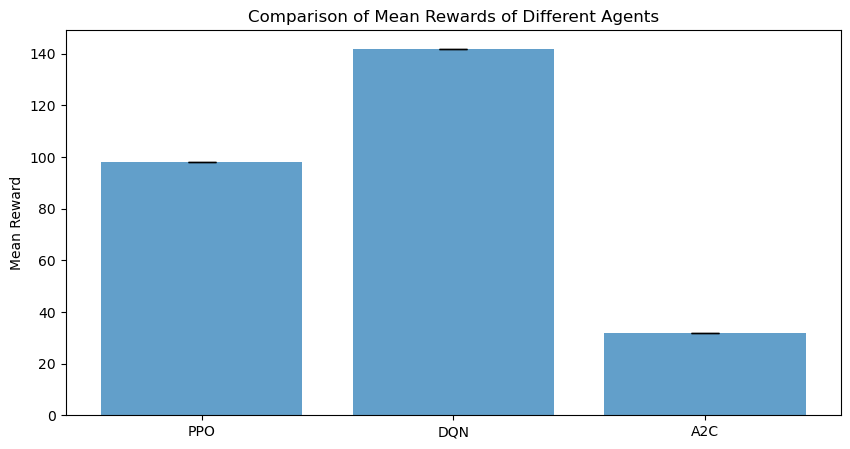

In [7]:
# Define the agents and their corresponding mean rewards and standard deviations
agents = ['PPO', 'DQN', 'A2C']
mean_rewards = [mean_reward_ppo, mean_reward_dqn, mean_reward_a2c]
std_rewards = [std_reward_ppo, std_reward_dqn, std_reward_a2c]

# Plotting the mean rewards
plt.figure(figsize=(10, 5))
plt.bar(agents, mean_rewards, yerr=std_rewards, align='center', alpha=0.7, ecolor='black', capsize=10)
plt.ylabel('Mean Reward')
plt.title('Comparison of Mean Rewards of Different Agents')
plt.show()

In [8]:
# Define the agents and their corresponding mean rewards, standard deviations, and models
agents = ['PPO', 'DQN', 'A2C']
mean_rewards = [mean_reward_ppo, mean_reward_dqn, mean_reward_a2c]
models = [ppo_model, dqn_model, a2c_model]

# Determine the index of the best model
best_index = np.argmax(mean_rewards)

# Save the best model
models[best_index].save("best_model_part1")

print(f"The best model is {agents[best_index]} with a mean reward of {mean_rewards[best_index]}")

The best model is DQN with a mean reward of 142.0


---

# Part 2

---

## Enabling action masking, train and test a MaskablePPO agent

In [9]:
# Define a function for the mask
def mask_fn(env):
    return env.get_mask()

# Create an instance of the environment with mask enabled
env = BoundedKnapsackEnv(n_items=200, max_weight=200, mask=True)

# Wrap the environment with the ActionMasker
vec_env = ActionMasker(env, mask_fn)

# Define the policy architecture
policy_kwargs = dict(
    net_arch=[dict(pi=[128, 128, 128], vf=[128, 128, 128])],  
)

# Train a MaskablePPO agent
model = MaskablePPO(
    "MlpPolicy",
    vec_env,
    policy_kwargs=policy_kwargs,
    verbose=1,
    n_steps=2048,
    batch_size=64,
    learning_rate=3e-4,
    ent_coef=0.0,
    gamma=0.99,
    gae_lambda=0.95,
    clip_range=0.2,
    vf_coef=0.5,
    max_grad_norm=0.5,
    target_kl=None,
)

# Adjust timesteps for meaningful training
model.learn(total_timesteps=TIME_STEPS, use_masking=True)

# Evaluate the agent
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=100)

print(f"Mean reward: {mean_reward} +/- {std_reward}")

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


c:\Users\20191678\AppData\Local\anaconda3\envs\torch-gpu\Lib\site-packages\sb3_contrib\common\maskable\policies.py:78: UserWarning: As shared layers in the mlp_extractor are removed since SB3 v1.8.0, you should now pass directly a dictionary and not a list (net_arch=dict(pi=..., vf=...) instead of net_arch=[dict(pi=..., vf=...)])
  warnings.warn(
c:\Users\20191678\AppData\Local\anaconda3\envs\torch-gpu\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.action_masks to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.action_masks` for environment variables or `env.get_wrapper_attr('action_masks')` that will search the reminding wrappers.
  logger.warn(


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 7.32     |
|    ep_rew_mean     | 385      |
| time/              |          |
|    fps             | 120      |
|    iterations      | 1        |
|    time_elapsed    | 17       |
|    total_timesteps | 2048     |
---------------------------------
Mean reward: 616.0 +/- 0.0


## Experiment with different neural network architectures and tune the algorithm hyperparameters

In [10]:
# Define a list of architectures to experiment with
architectures = [
    [dict(pi=[64, 64], vf=[64, 64])],
    [dict(pi=[128, 128], vf=[128, 128])],
    [dict(pi=[256, 256], vf=[256, 256])],
    [dict(pi=[128, 64], vf=[128, 64])],
]

# Define a list of learning rates to experiment with
learning_rates = [1e-3, 3e-4, 1e-4]

# Initialize best mean reward to negative infinity
best_mean_reward = -np.inf

# Loop over the architectures and learning rates
for arch in architectures:
    for lr in learning_rates:
        policy_kwargs = dict(net_arch=arch)
        model = MaskablePPO(
            "MlpPolicy",
            vec_env,
            policy_kwargs=policy_kwargs,
            verbose=1,
            n_steps=2048,
            batch_size=64,
            learning_rate=lr,
            ent_coef=0.0,
            gamma=0.99,
            gae_lambda=0.95,
            clip_range=0.2,
            vf_coef=0.5,
            max_grad_norm=0.5,
            target_kl=None,
        )
        model.learn(total_timesteps=TIME_STEPS, use_masking=True)
        mean_reward_mppo, std_reward_mppo = evaluate_policy(model, env, n_eval_episodes=100)
        print(f"Architecture: {arch}, Learning Rate: {lr}, Mean reward: {mean_reward} +/- {std_reward}")
        
        # If this mean reward is greater than the current best, save this model
        if mean_reward_mppo > best_mean_reward:
            best_mean_reward = mean_reward_mppo
            model.save("best_model_part2")
            print(f"New best mean reward: {mean_reward_mppo} +/- {std_reward_mppo}, model saved.")

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 7.67     |
|    ep_rew_mean     | 390      |
| time/              |          |
|    fps             | 137      |
|    iterations      | 1        |
|    time_elapsed    | 14       |
|    total_timesteps | 2048     |
---------------------------------
Architecture: [{'pi': [64, 64], 'vf': [64, 64]}], Learning Rate: 0.001, Mean reward: 616.0 +/- 0.0
New best mean reward: 616.0 +/- 0.0, model saved.
Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 7.36     |
|    ep_rew_mean     | 382      |
| time/              |          |
|    fps             | 122      |
|    iterations      | 1        |
|    time_elapsed    | 16       |
|    total_timesteps | 2048     |
---------------

## Evaluate the agent and compare the best results obtained with those of the best agent from Part 1.

In [12]:
# Load the best model from Part 1
if agents[best_index] == 'PPO':
    best_model_part1 = PPO.load("best_model_part1", env=env)
elif agents[best_index] == 'DQN':
    best_model_part1 = DQN.load("best_model_part1", env=env)
elif agents[best_index] == 'A2C':
    best_model_part1 = A2C.load("best_model_part1", env=env)
else:
    print("Unknown model type")
    
# Load the best model from Part 2
best_model_part2 = MaskablePPO.load("best_model_part2", env=env)

# Evaluate the best model from Part 1
mean_reward_part1, std_reward_part1 = evaluate_policy(best_model_part1, env, n_eval_episodes=100)

# Evaluate the best model from Part 2
mean_reward_part2, std_reward_part2 = evaluate_policy(best_model_part2, env, n_eval_episodes=100)

# Print the results
print(f"Part 1 - Mean reward: {mean_reward_part1} +/- {std_reward_part1}")
print(f"Part 2 - Mean reward: {mean_reward_part2} +/- {std_reward_part2}")

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Part 1 - Mean reward: 224.0 +/- 0.0
Part 2 - Mean reward: 616.0 +/- 0.0
